In [53]:
from work.models.decoder import RecurrentActivityClassificationNetwork

model = RecurrentActivityClassificationNetwork(1, 1, stateful=True)
model.load_weights('../models/training/lstm_activity_classification/lstm_activity_classification_v2_02_e100.hdf5')
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [54]:
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)

In [82]:
video = None
for v in dataset.videos:
    if v.video_id == 'hfk93bEIjwc':
        video = v
print(video.serialize())
video_path = '../downloads/dataset/validation/'+video.video_id+'.mp4'

{'num_frames': 2150, 'subset': 'validation', 'resolution': '1920x1080', 'duration': 86.054, 'url': 'https://www.youtube.com/watch?v=hfk93bEIjwc', 'annotations': [{'label': 'Rafting', 'segment': [13.819193447737911, 85.801]}]}


In [83]:
import numpy as np
features = np.load('../downloads/features/'+video.video_id+'.npy')
print(features[:,:].shape)
nb_instances = features.shape[0]

features = features.reshape(nb_instances, 1, 4096)
print(features.shape)
model.reset_states()
YY=model.predict(features, batch_size=1)
print(YY.shape)


(134, 4096)
(134, 1, 4096)
(134, 1, 201)


In [84]:
YY = np.argmax(YY, axis=2)

In [85]:
video.get_video_instances(16, 0)
ground_trouth = np.array([instance.output for instance in video.instances])
print(ground_trouth)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69]


In [86]:
print(YY.shape)
YY=YY.reshape(nb_instances)
print(YY)
print(ground_trouth)


(134, 1)
[ 0  0  0  0  0  0  0  0  0 69  0 69 69  0  0  0  0  0  0  0 73 73 73 73 73
 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73
 73 73 73 69 73 73 69 69 69 73  0 73 73 69 69  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 17 17 73 73  0  0  0  0 69 73 73 73 73 73  0 69 69 69 69 73 73
 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 69 73  0 69
 69 73 69 69 69 69 69 69 69]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69]


In [87]:
dataset.get_output_index(video.label)

69

In [88]:
print(video.subset)

validation


In [89]:
print(ground_trouth==YY)

[ True  True  True  True  True  True  True  True  True False  True False
 False  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False  True  True  True False
 False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False  True  True False  True  True  True  True  True
  True  True]


In [90]:
counts = np.bincount(YY)
print(counts)

[38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0 70]


In [91]:
predicted_class = np.argmax(np.bincount(YY)[1:])+1

In [92]:
print(predicted_class)

73


In [93]:
k_3 = np.argsort(counts[1:])[::-1][:3] + 1
print(k_3)

(counts[k_3]/np.sum(counts[1:]))

[73 69 17]


array([ 0.72916667,  0.25      ,  0.02083333])

In [94]:
from work.processing.output import get_top_k_predictions, get_top_k_predictions_score

top_3 = get_top_k_predictions(YY, 3)
print(top_3)
_, scores = get_top_k_predictions_score(YY, 3)
print(scores)
for index in top_3:
    print(scores, dataset.labels[index][1])

[73 69 17]
[ 0.72916667  0.25        0.02083333]
[ 0.72916667  0.25        0.02083333] River tubing
[ 0.72916667  0.25        0.02083333] Rafting
[ 0.72916667  0.25        0.02083333] Canoeing


In [95]:
print(ground_trouth)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69]


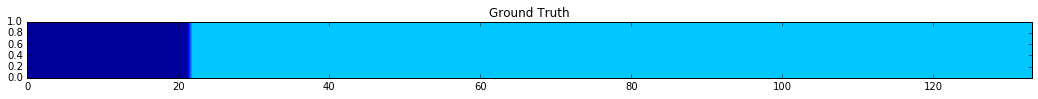

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

normalize = matplotlib.colors.Normalize(vmin=0, vmax=201)


plt.figure(num=None, figsize=(18, 1), dpi=100)
plt.contourf(np.broadcast_to(ground_trouth, (2, nb_instances)), norm=normalize)
plt.title('Ground Truth')
#plt.imshow(ground_trouth.reshape(1,nb_instances).astype(np.float32))
plt.show()

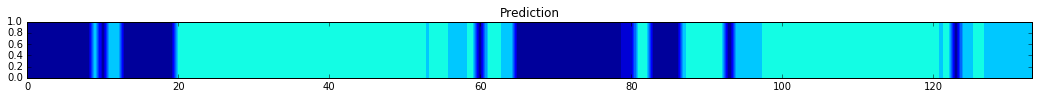

In [97]:
plt.figure(num=None, figsize=(18, 1), dpi=100)
plt.contourf(np.broadcast_to(YY, (2, nb_instances)), norm=normalize)
plt.title('Prediction')
#plt.imshow(ground_trouth.reshape(1,nb_instances).astype(np.float32))
plt.show()

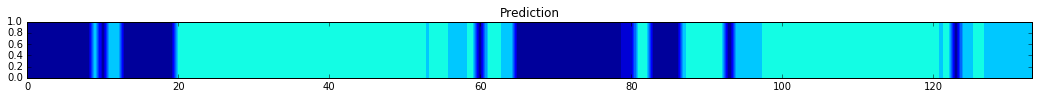

In [98]:
from work.processing.visualization import plot_sequence

plot_sequence(YY, title='Prediction')

In [99]:
print(video.label)

Rafting


In [100]:
print(video.url)

https://www.youtube.com/watch?v=hfk93bEIjwc


In [101]:
score = np.sum(YY==ground_trouth)/len(YY)

In [102]:
print(score)

0.283582089552


In [103]:
import random

videos = dataset.get_subset_videos('validation')
v = random.choice(videos)
print(v.video_id)

j8NwT9JBQJk


In [104]:
print(YY)

[ 0  0  0  0  0  0  0  0  0 69  0 69 69  0  0  0  0  0  0  0 73 73 73 73 73
 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73
 73 73 73 69 73 73 69 69 69 73  0 73 73 69 69  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 17 17 73 73  0  0  0  0 69 73 73 73 73 73  0 69 69 69 69 73 73
 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 69 73  0 69
 69 73 69 69 69 69 69 69 69]


In [105]:
np.save('YY', YY)

In [106]:
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)
video = None
for v in dataset.videos:
    if v.video_id == 'Zn84iOuIkDs':
        video = v

import numpy as np
from work.processing.output import get_temporal_predictions

YY = np.load('YY.npy')
print(YY)

predictions = get_temporal_predictions(YY, fps=video.num_frames/video.duration, clip_length=16)

print(predictions)

[ 0  0  0  0  0  0  0  0  0 69  0 69 69  0  0  0  0  0  0  0 73 73 73 73 73
 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73
 73 73 73 69 73 73 69 69 69 73  0 73 73 69 69  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 17 17 73 73  0  0  0  0 69 73 73 73 73 73  0 69 69 69 69 73 73
 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 69 73  0 69
 69 73 69 69 69 69 69 69 69]
[{'label': 73, 'score': 1, 'segment': [11.866982680036463, 31.447504102096627]}, {'label': 73, 'score': 1, 'segment': [32.04085323609845, 33.227551504102095]}, {'label': 73, 'score': 1, 'segment': [35.00759890610757, 35.60094804010939]}, {'label': 73, 'score': 1, 'segment': [36.19429717411121, 37.38099544211486]}, {'label': 73, 'score': 1, 'segment': [48.06127985414767, 49.247978122151316]}, {'label': 73, 'score': 1, 'segment': [52.214723792160434, 55.18146946216955]}, {'label': 73, 'score': 1, 'segment': [58.14821513217866, 71.7952452142206]}, {'label': 73, 'score': 1, 'segment': [72

In [4]:
import numpy as np
instances = np.array([video.num_frames//16 for video in dataset.videos])

In [5]:
print(np.min(instances))
print(np.max(instances))

1
1826


In [6]:
np.argmin(instances)

2035

In [7]:
dataset.videos[_].serialize()

{'annotations': [{'label': 'Throwing darts',
   'segment': [0.19999999999999998, 2.865034013605442]}],
 'duration': 3.066,
 'num_frames': 29,
 'resolution': '320x240',
 'subset': 'validation',
 'url': 'https://www.youtube.com/watch?v=j73Wh1olDsA'}